# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
address = 'https://raw.githubusercontent.com/kmisztal/effective_python/refs/heads/master/lab12_files/US_Baby_Names_right.csv'

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = pd.read_csv(address)
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [5]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [6]:
baby_names.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)
baby_names.head(10)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
5,Abigail,2004,F,AK,37
6,Olivia,2004,F,AK,33
7,Isabella,2004,F,AK,30
8,Alyssa,2004,F,AK,29
9,Sophia,2004,F,AK,28


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [7]:
baby_names.groupby('Gender')['Count'].sum().idxmax()

'M'

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [8]:
baby_names.groupby('Name')['Count'].sum().nlargest(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

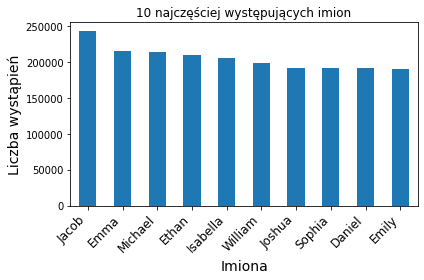

In [9]:
import matplotlib.pyplot as plt
people = baby_names.groupby(['Name', 'Gender'])['Count'].sum().nlargest(10).reset_index()
people.plot(kind='bar', x='Name', y='Count', title='10 najczęściej występujących imion', legend=False)
plt.xlabel('Imiona', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

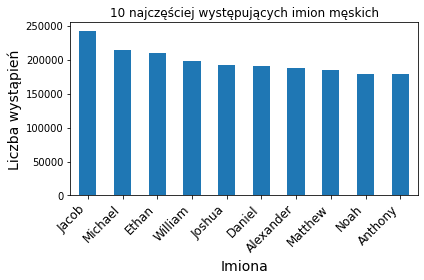

In [10]:
male = baby_names.query("Gender == 'M'").groupby(['Name', 'Gender'])['Count'].sum().nlargest(10).reset_index()
male.plot(kind='bar', x='Name', y='Count', title='10 najczęściej występujących imion męskich', legend=False)
plt.xlabel('Imiona', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

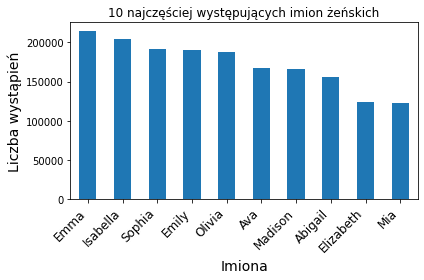

In [11]:
male = baby_names.query("Gender == 'F'").groupby(['Name', 'Gender'])['Count'].sum().nlargest(10).reset_index()
male.plot(kind='bar', x='Name', y='Count', title='10 najczęściej występujących imion żeńskich', legend=False)
plt.xlabel('Imiona', fontsize=14)
plt.ylabel('Liczba wystąpień', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [12]:
baby_names.Name.nunique()

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [13]:
import numpy as np
df = baby_names[['Name', 'Count']].groupby("Name").sum()
df['Probability'] = df['Count'].apply(lambda x: x/df['Count'].sum())

def random_name(n):
    p = df['Probability'].values
    for _ in range(n):
        yield np.random.choice(df.index, size=1, p=p)[0]

gen = random_name(10)

for name in gen:
    print(name)

Brandon
Shirley
Emmerson
Makayla
Reyna
Daisy
Emma
Kaydence
Caleb
Adrian


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [14]:
df.nlargest(1, 'Count')


,Count,Probability
Name,,
Jacob,242874,0.006857


In [15]:
print(f"Średnia: {df['Count'].mean():.2f}")
print(f"Mediana: {df['Count'].median()}")
print(f"Odchylenie standardowe: {df['Count'].std():.2f}")

Średnia: 2008.93
Mediana: 49.0
Odchylenie standardowe: 11006.07


## Część II

Krok 1: Wczytaj dane

In [16]:
address2 = 'https://raw.githubusercontent.com/kmisztal/effective_python/refs/heads/master/lab12_files/ocupation.csv'
occ = pd.read_csv(address2, sep = '|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [17]:
occ.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [18]:
occ.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [19]:
occ.shape

(943, 5)

Krok 5: Wypisz nazwy kolumn

In [20]:
occ.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Krok 6: Ile różnych zawodów jest w zbiorze?

In [21]:
occ.occupation.nunique()

21

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

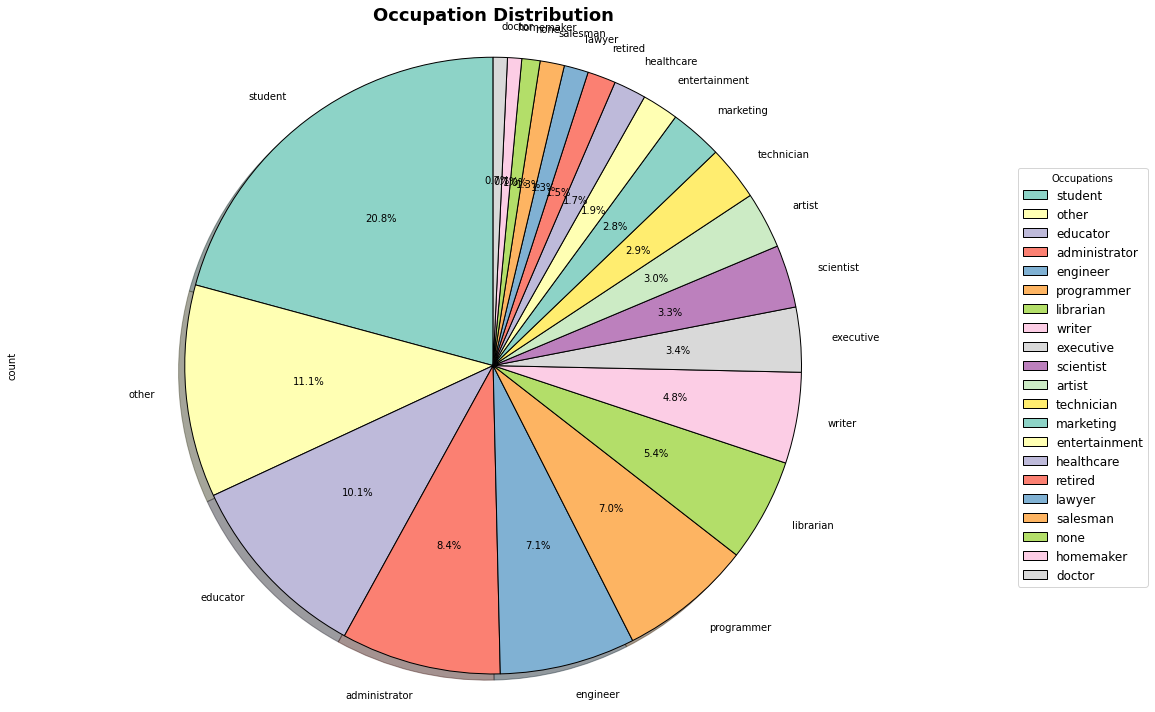

In [22]:
occupations = occ.occupation.value_counts()
plt.figure(figsize=(16, 10))
occupations.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    colors=plt.cm.Set3.colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Occupation Distribution', fontsize=18, fontweight='bold')
plt.legend(
    occupations.index, 
    title="Occupations", 
    loc='upper right', 
    bbox_to_anchor=(1.2, 0.8), 
    fontsize=12
)

plt.axis('equal')
plt.tight_layout()
plt.show()

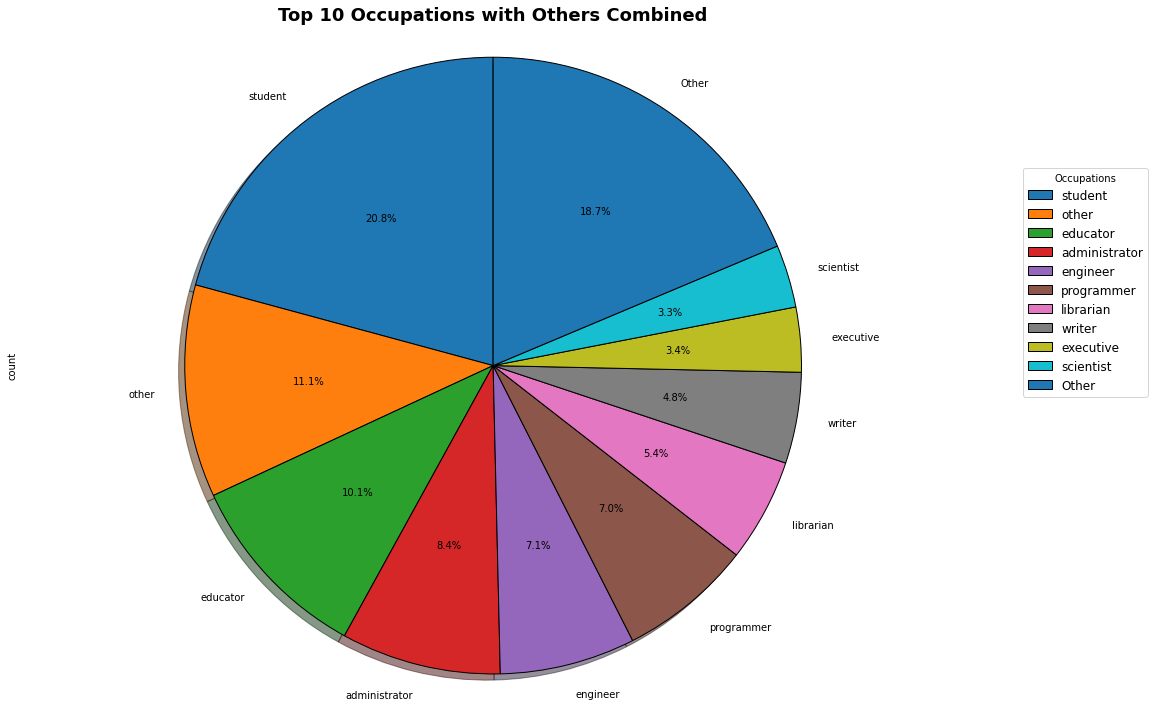

In [23]:
occupation_counts = pd.Series(occ.occupation.value_counts().nlargest(10))
occupation_counts['Other'] = occ.occupation.value_counts()[10:].sum()

colors = plt.cm.tab10.colors

plt.figure(figsize=(16, 10))
occupation_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Top 10 Occupations with Others Combined', fontsize=18, fontweight='bold')
plt.legend(occupation_counts.index, title='Occupations', loc='upper right', bbox_to_anchor=(1.2, 0.8), fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

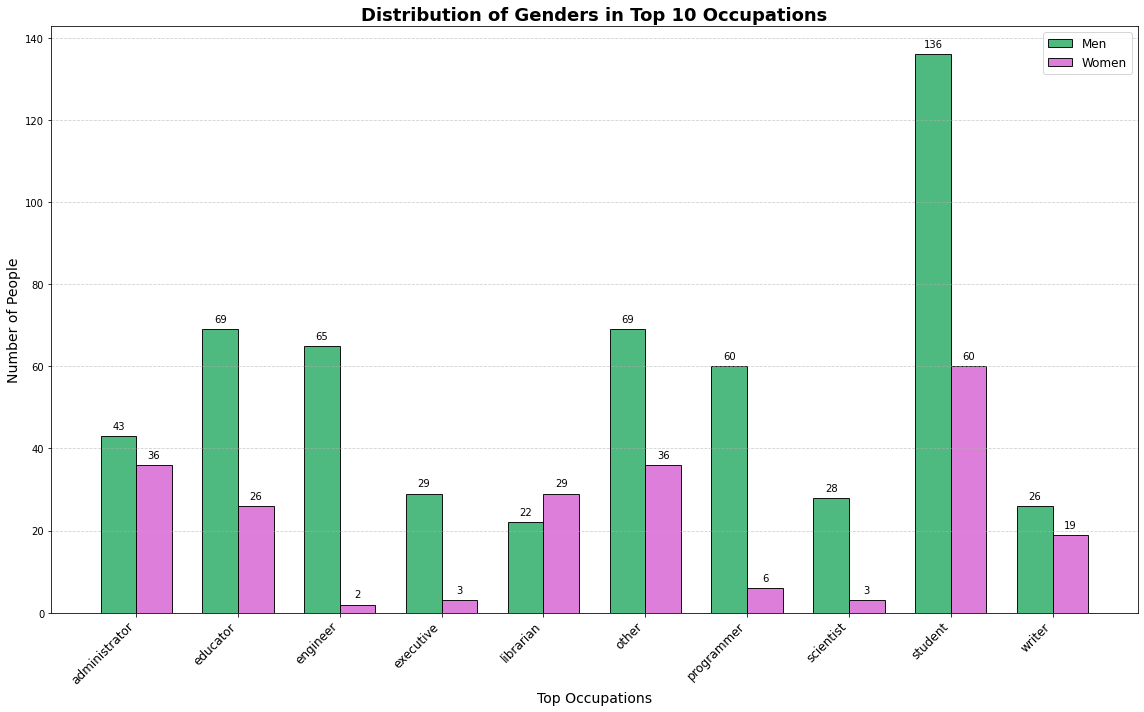

In [24]:
occupation_gender_counts = occ.groupby(['occupation', 'gender']).size().reset_index(name='count')

top_occupations = (
    occupation_gender_counts.groupby('occupation')['count'].sum()
    .nlargest(10).index
)

top_occupation_data = occupation_gender_counts[
    occupation_gender_counts['occupation'].isin(top_occupations)
]

top_occ_women = top_occupation_data.loc[top_occupation_data['gender'] == 'F']
top_occ_men = top_occupation_data.loc[top_occupation_data['gender'] == 'M']

ind = np.arange(len(top_occ_men))
width = 0.35

fig, ax = plt.subplots(figsize=(16, 10))

rects1 = ax.bar(ind - width/2, top_occ_men['count'], width,
                color='mediumseagreen', label='Men', alpha=0.9, edgecolor='black')
rects2 = ax.bar(ind + width/2, top_occ_women['count'], width,
                color='orchid', label='Women', alpha=0.9, edgecolor='black')

ax.set_ylabel('Number of People', fontsize=14)
ax.set_xlabel('Top Occupations', fontsize=14)
ax.set_title('Distribution of Genders in Top 10 Occupations', fontsize=18, fontweight='bold')
ax.set_xticks(ind)
ax.set_xticklabels(top_occ_men['occupation'], rotation=45, ha='right', fontsize=12)

ax.legend(fontsize=12)

ax.grid(True, which='major', linestyle='--', alpha=0.6, axis='y')

def add_bar_labels(rects):
    """Dodaje wartości nad słupkami."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # Odstęp tekstu od góry słupka
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

add_bar_labels(rects1)
add_bar_labels(rects2)

plt.tight_layout()
plt.show()


Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

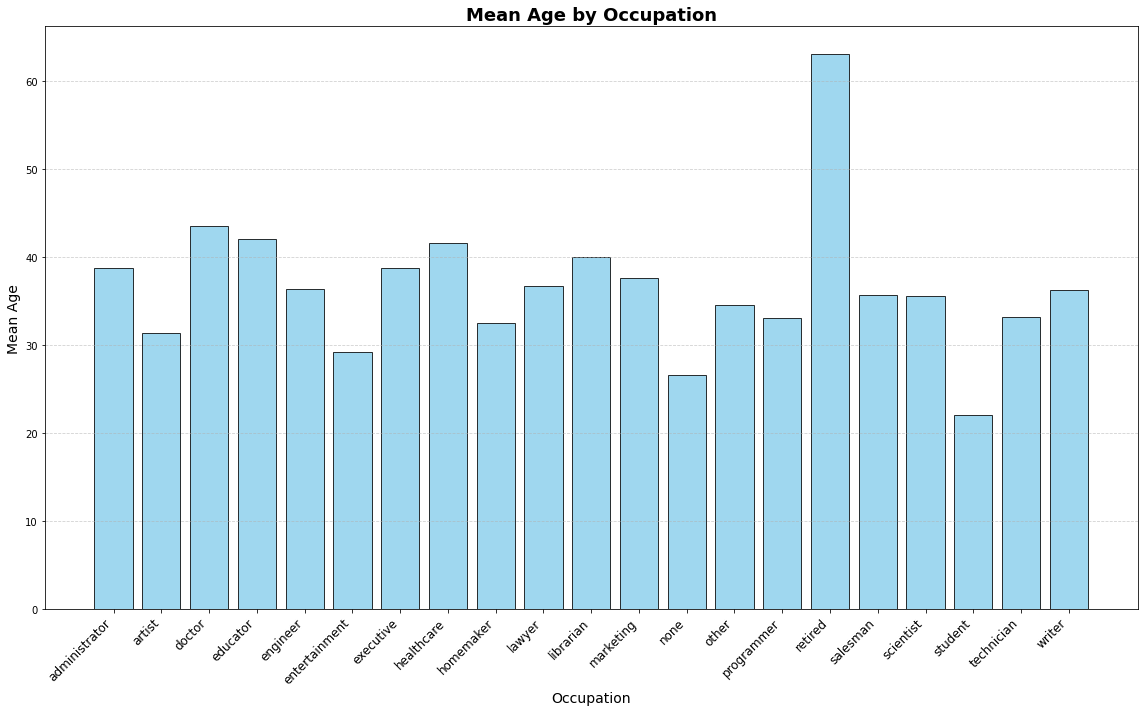

In [25]:
mean_age_occ = occ[['occupation', 'age']].groupby('occupation').mean()

plt.figure(figsize=(16, 10))
plt.bar(mean_age_occ.index, mean_age_occ.values.flatten(), color='skyblue', edgecolor='black', alpha=0.8)
plt.title("Mean Age by Occupation", fontsize=18, fontweight='bold')
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Mean Age", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

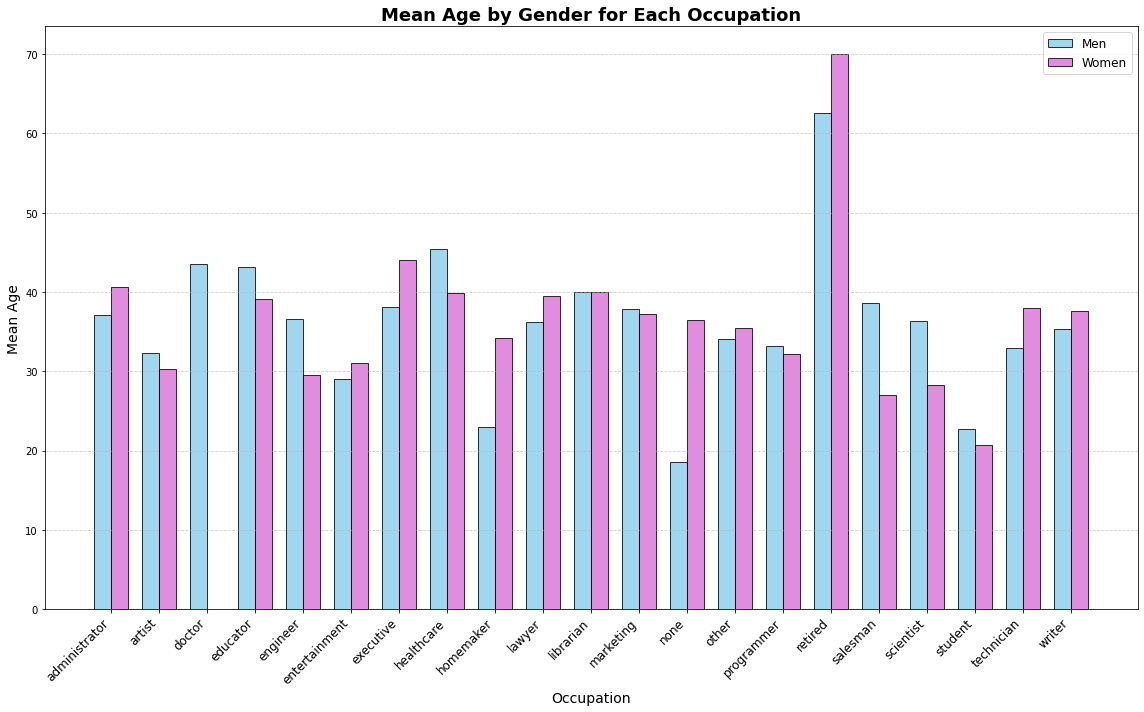

In [26]:
mean_age_by_gender = occ.groupby(['occupation', 'gender'])['age'].mean().unstack()

occupations = mean_age_by_gender.index
mean_age_men = mean_age_by_gender['M']
mean_age_women = mean_age_by_gender['F']
ind = np.arange(len(occupations))
width = 0.35

plt.figure(figsize=(16, 10))
plt.bar(ind - width/2, mean_age_men, width, label='Men', color='skyblue', edgecolor='black', alpha=0.8)
plt.bar(ind + width/2, mean_age_women, width, label='Women', color='orchid', edgecolor='black', alpha=0.8)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Mean Age', fontsize=14)
plt.title('Mean Age by Gender for Each Occupation', fontsize=18, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(ind, occupations, rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()